In [2]:
# Get ye data
import glob
import os

data_files = glob.glob(os.path.expanduser('~\\Data\\*.json'))


In [5]:
import platform
print(platform.python_version())

3.12.2


In [ ]:
import pandas as pd

data_sets = []

file = data_files[0]
print(file)

f = open(file, encoding='utf-16')
df = pd.read_json(f)

In [23]:
df['closed'] = pd.to_datetime(df['closedAt'], format='ISO8601')

In [26]:
print(type(df.closed[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [29]:
for_plot = df.groupby(df.closed.dt.month)['url'].count()

<Axes: xlabel='closed'>

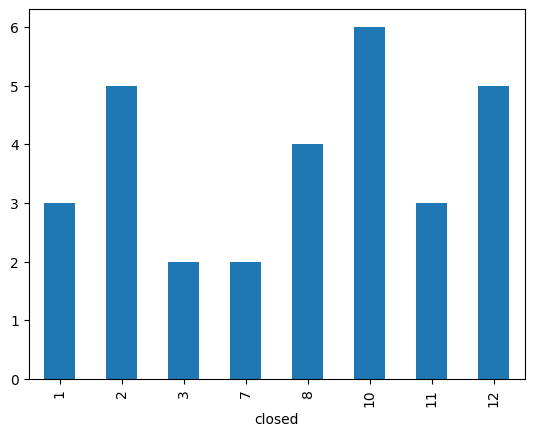

In [33]:
for_plot.plot(kind='bar')